# 차원 축소
## feature selection

> 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거 
## feature extraction

> 기존 피처를 저차원의 중요 피처로 압축해서 추출하는 것


In [3]:
# PCA

In [4]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
iris=load_iris()
columns=['sepal_length','sepal_width','petal_length','petal_width']
irisDF=pd.DataFrame(iris.data,columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


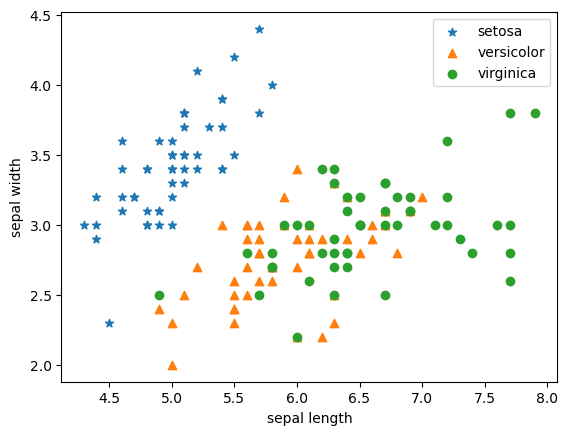

In [5]:
markers=['*','^','o']
for i,marker in enumerate(markers):
    x_axis_data=irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data=irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler
iris_scaled=StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [7]:
# 4차원을 2차원으로 변환
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [8]:
# PCA 변환된 데이터 칼럼명 지정
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca=pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head()

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


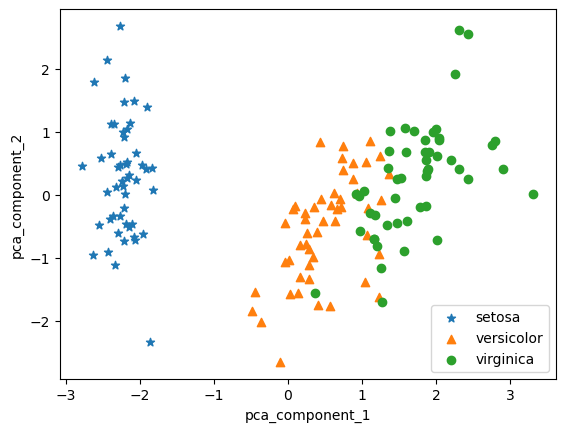

In [9]:
# 변환된 데이터 세트 시각화
for i,marker in enumerate(markers):
    x_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [10]:
# 변동성 비율 확인
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [11]:
# 원본, 변환된 데이터 각각 분류 후 비교
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
rf=RandomForestClassifier(random_state=0)
scores=cross_val_score(rf,iris.data,iris.target,scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도',scores)
print('원본 데이터 평균 정확도',np.mean(scores))

원본 데이터 교차 검증 개별 정확도 [0.98 0.94 0.98]
원본 데이터 평균 정확도 0.9666666666666667


In [12]:
pca_X=irisDF_pca[['pca_component_1','pca_component_2']]
scores_pca=cross_val_score(rf,pca_X,iris.target,scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도',scores_pca)
print('원본 데이터 평균 정확도',np.mean(scores_pca))

원본 데이터 교차 검증 개별 정확도 [0.88 0.88 0.9 ]
원본 데이터 평균 정확도 0.8866666666666667


### 신용카드 고객 데이터 세트

In [16]:
df=pd.read_csv("C:/Users/MYCOM/data/UCI_Credit_Card.csv")
print(df.shape)

(30000, 25)


In [17]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df.drop([])